In [1]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [106]:
df = pd.read_csv('../data/bn_feat.csv', index_col = 0)
# df = df.sample(frac=0.50) #loc[1:100,:]  #.

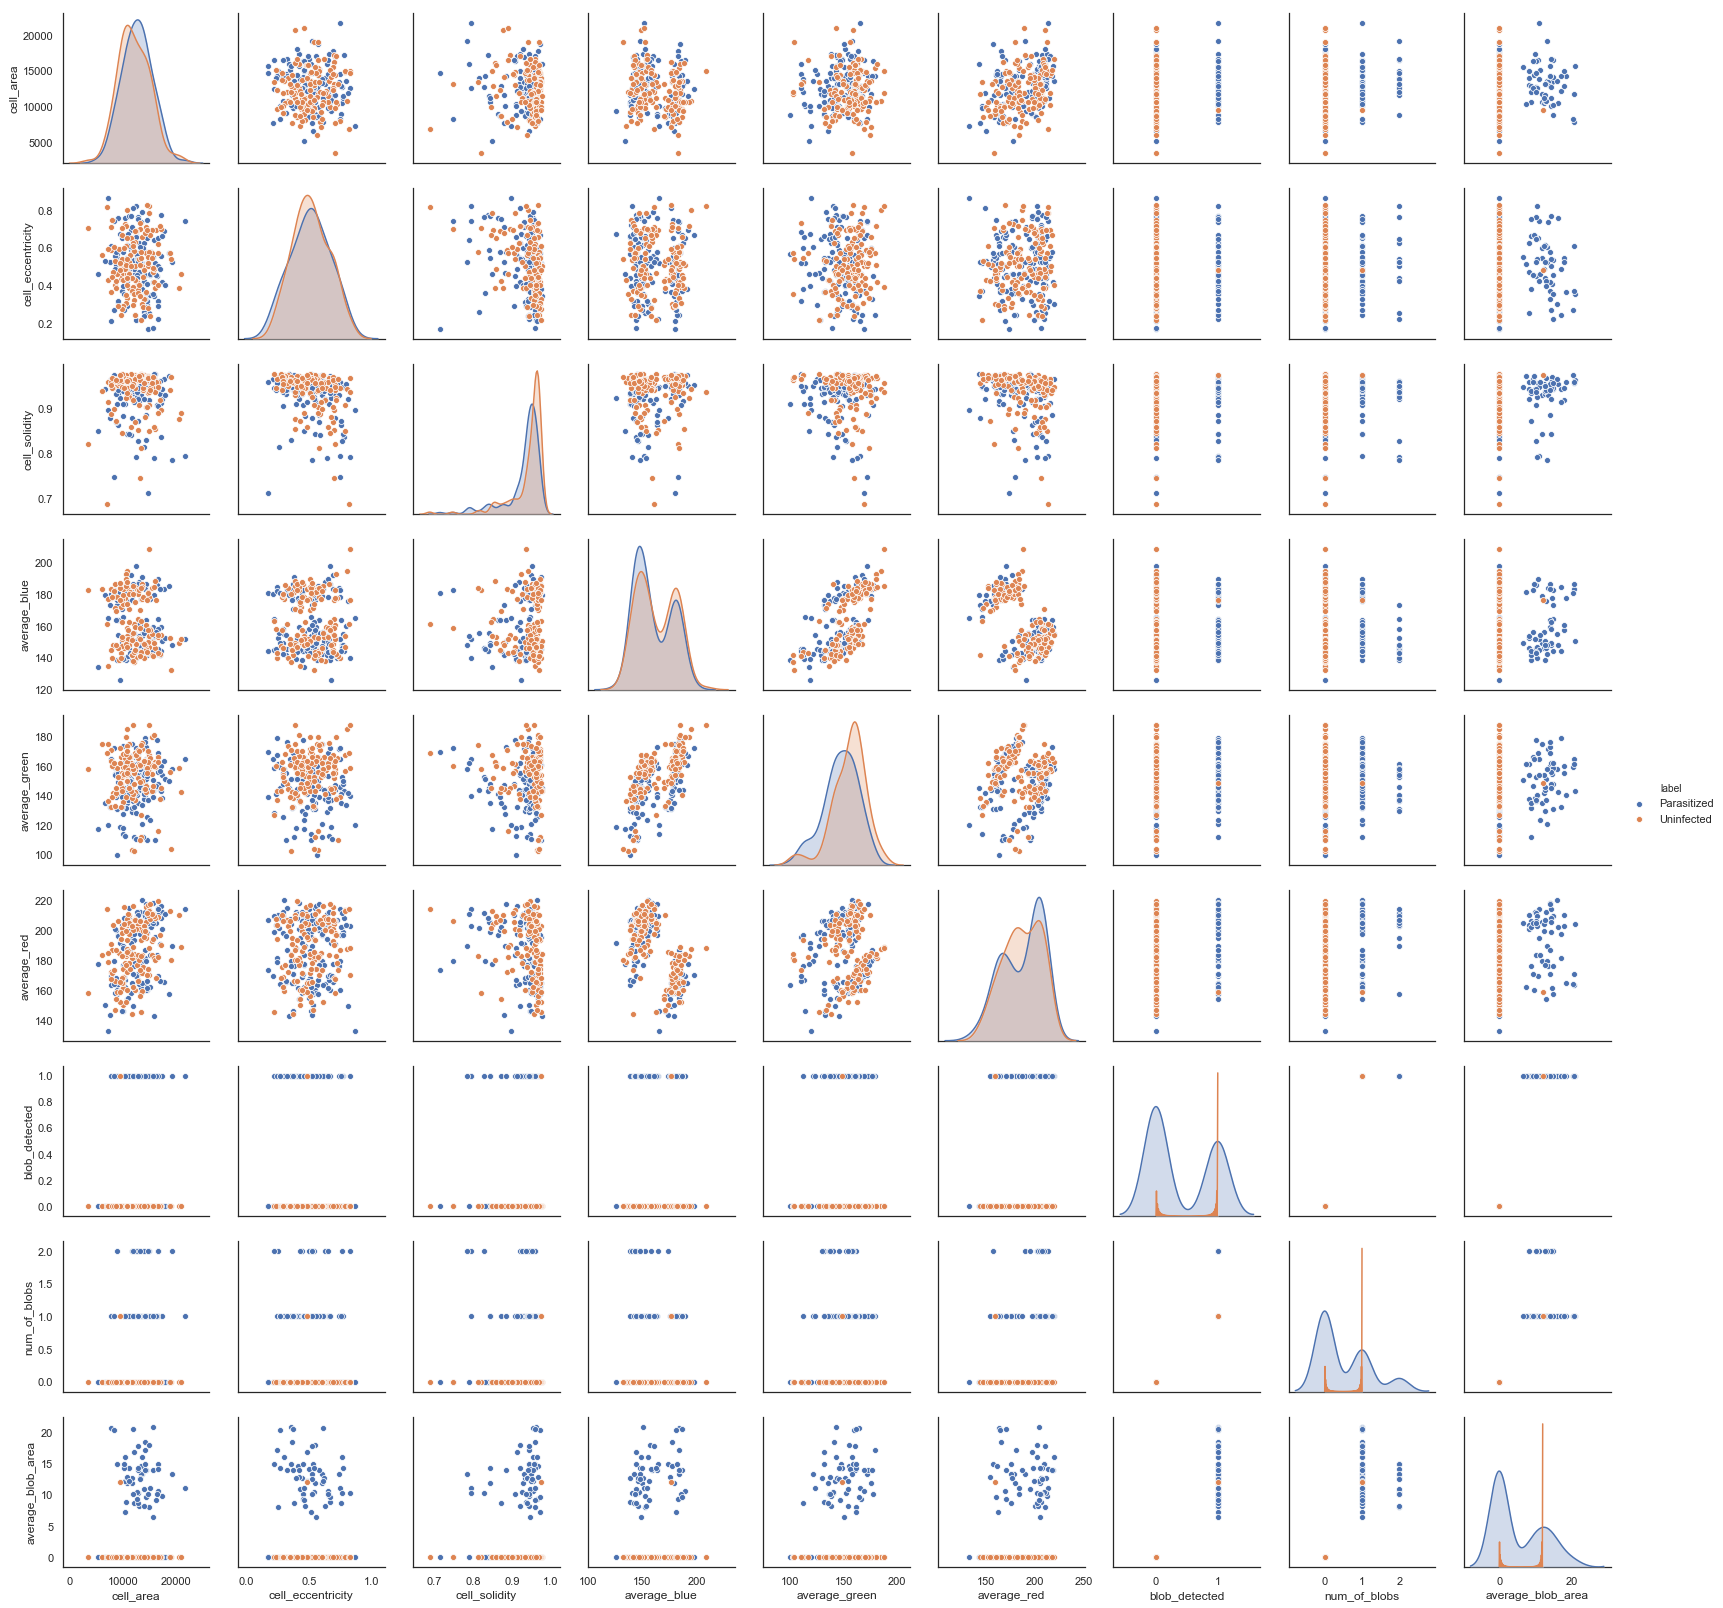

In [64]:
# sns.pairplot(df, hue='label');

In [65]:
import umap

In [66]:
reducer = umap.UMAP(random_state=42)

In [107]:
features = df.drop(columns=['label','fn'])
reducer.fit(features)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=15, negative_sample_rate=5, random_state=42,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=False)

In [108]:
embedding = reducer.transform(features)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(27558, 2)

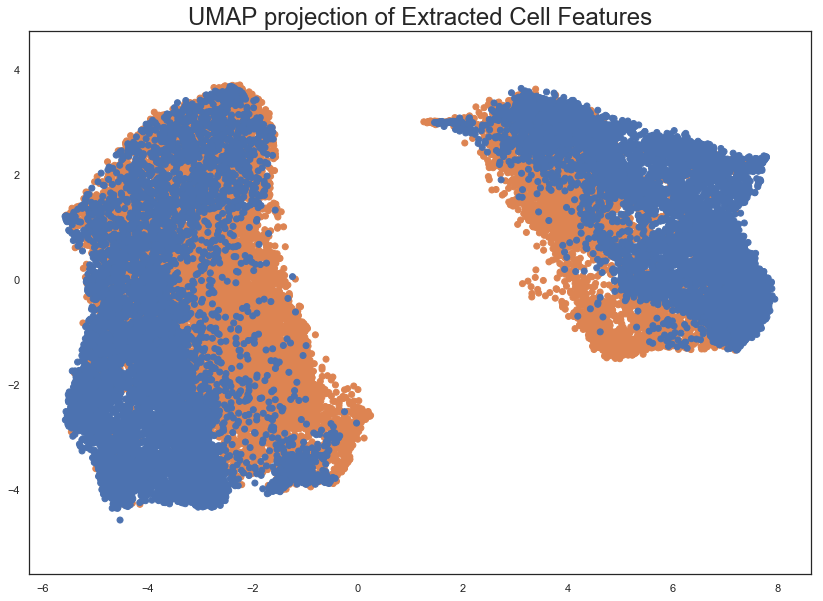

In [109]:
mask = df.label == 'Parasitized'
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in mask.values*1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of Extracted Cell Features', fontsize=24);

In [110]:
from io import BytesIO
from PIL import Image
import base64
# df['label']

In [111]:
df['path'] = '../datasets/cell_images/' + df['label'] + '/' + df['fn']

In [112]:
df.shape
# df.loc[:,['path']]

(27558, 2051)

In [113]:
def embeddable_image(image_path):
#     img_data = 255 - 15 * data.astype(np.uint8)
#     image_folder = '../datasets/cell_image/'#make this the upload folder
    image = Image.open(str(image_path)).resize((64, 64), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

In [114]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10
output_notebook()

Loading BokehJS ...

In [115]:
# print(df.loc[1,['path']].values[0])
# print(df.index)
# embeddable_image(df.loc[1,['path']].values[0]);

In [116]:
df_images = pd.DataFrame(embedding, columns=('x','y'), index=df.index)
df_images['image'] = list(map(embeddable_image, list(df['path'].values)))
df_images['label'] = df.loc[:,['label']].astype(str)

# list(df_images.label.values)
# df_images.label.astype(str)

In [105]:
datasource = ColumnDataSource(df_images)
color_mapping = CategoricalColorMapper(factors = [str(x) for x in list(set(df_images.label.astype(str).values))],
                                       palette=Spectral10)

plot_figure = figure(
    title='UMAP projection of the malaria dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 12px; color: #224499'>Class:</span>
        <br /><span style='font-size: 12px'>@label</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='label', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)